In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import seaborn as sns

lowpoint = pd.read_csv('/Users/mattmastin/Desktop/Battery_Research/lowpoint_full.csv')
midpoint = pd.read_csv('/Users/mattmastin/Desktop/Battery_Research/midpoint_full.csv')
highpoint = pd.read_csv('/Users/mattmastin/Desktop/Battery_Research/highpoint_full.csv')
stretchpoint = pd.read_csv('/Users/mattmastin/Desktop/Battery_Research/stretchpoint_full.csv')

lowpoint.shape, midpoint.shape, highpoint.shape, stretchpoint.shape

((690, 14), (690, 14), (690, 14), (690, 14))

In [3]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [66]:
class StringConverter(dict):
    def __contains__(self, item):
        return True
    
    def __getitem__(self, item):
        return str
    
    def __get(self, default=None):
        return str

In [33]:
lowpoint.head()

,Rate,Building Type,City,Cost Point Selector,Battery Capacity (kWh),Battery Power (kW),BAU Demand Cost,BAU Energy Cost,Capital Cost ($),Max Demand Rate ($/kW),Npv ($),PV Size (kW),Total Demand Savings ($),Total kWh Savings ($)
0,E-19_Medium_General_Demand_TOU_(Secondary_Volu...,Fast Food,San Francisco,1,65 kWh,11 kW,87751.00,164109.00,$41K,$34.72,$0M,56 kW,32045.80,74991.00
1,Schedule_TOU-GSD-10_Time_Of_Use_-_General_Serv...,Outpatient,Atlanta,1,0 kWh,0 kW,374541.00,900645.00,$36K,$15.66,$0M,74 kW,15181.00,49003.00
2,Power_and_Light_Medium_Schedule_PLM-11,Retail Store,Atlanta,1,0 kWh,0 kW,0.00,235549.00,$0K,$0.00,$0M,0 kW,0.00,0.00
3,General_Service_(A14),Primary School,Duluth,1,0 kWh,0 kW,300907.00,519891.00,$40K,$14.98,$0M,82 kW,22187.00,54835.00
4,A-10_Medium_General_Demand_Service_(Secondary_...,Supermarket,San Francisco,1,903 kWh,125 kW,471299.00,2346650.00,$551K,$16.78,$0M,770 kW,225257.00,1325750.00


In [4]:
low = lowpoint.copy()
mid = midpoint.copy()
high = highpoint.copy()
stretch = stretchpoint.copy()

low['Battery Capacity (kWh)'] = low['Battery Capacity (kWh)'].str.slice(0, -3, 1
                                                            ).str.replace(',', '').astype(int)
low['Battery Power (kW)'] = low['Battery Power (kW)'].str.slice(0, -3, 1
                                                            ).str.replace(',', '').astype(int)
low['Capital Cost ($)'] = low['Capital Cost ($)'].str.slice(1, -1, 1
                                                            ).str.replace(',', '').astype(int) * 1000
low['Max Demand Rate ($/kW)'] = low['Max Demand Rate ($/kW)'].str.slice(1, 5, 1).astype(float)
low['Npv ($)'] = low['Npv ($)'].str.slice(1, 2, 1).astype(int) * 1000000
low['PV Size (kW)'] = low['PV Size (kW)'].str.slice(0, -2, 1).str.replace(',', '').astype(int)


mid['Battery Capacity (kWh)'] = mid['Battery Capacity (kWh)'].str.slice(0, -3, 1
                                                            ).str.replace(',', '').astype(int)
mid['Battery Power (kW)'] = mid['Battery Power (kW)'].str.slice(0, -3, 1
                                                            ).str.replace(',', '').astype(int)
mid['Capital Cost ($)'] = mid['Capital Cost ($)'].str.slice(1, -1, 1
                                                            ).str.replace(',', '').astype(int) * 1000
mid['Max Demand Rate ($/kW)'] = mid['Max Demand Rate ($/kW)'].str.slice(1, 5, 1).astype(float)
mid['Npv ($)'] = mid['Npv ($)'].str.slice(1, 2, 1).astype(int) * 1000000
mid['PV Size (kW)'] = mid['PV Size (kW)'].str.slice(0, -2, 1).str.replace(',', '').astype(int)


high['Battery Capacity (kWh)'] = high['Battery Capacity (kWh)'].str.slice(0, -3, 1
                                                            ).str.replace(',', '').astype(int)
high['Battery Power (kW)'] = high['Battery Power (kW)'].str.slice(0, -3, 1
                                                            ).str.replace(',', '').astype(int)
high['Capital Cost ($)'] = high['Capital Cost ($)'].str.slice(1, -1, 1
                                                            ).str.replace(',', '').astype(int) * 1000
high['Max Demand Rate ($/kW)'] = high['Max Demand Rate ($/kW)'].str.slice(1, 5, 1).astype(float)
high['Npv ($)'] = high['Npv ($)'].str.slice(1, 2, 1).astype(int) * 1000000
high['PV Size (kW)'] = high['PV Size (kW)'].str.slice(0, -2, 1).str.replace(',', '').astype(int)


stretch['Battery Capacity (kWh)'] = stretch['Battery Capacity (kWh)'].str.slice(0, -3, 1
                                                            ).str.replace(',', '').astype(int)
stretch['Battery Power (kW)'] = stretch['Battery Power (kW)'].str.slice(0, -3, 1
                                                            ).str.replace(',', '').astype(int)
stretch['Capital Cost ($)'] = stretch['Capital Cost ($)'].str.slice(1, -1, 1
                                                            ).str.replace(',', '').astype(int) * 1000
stretch['Max Demand Rate ($/kW)'] = stretch['Max Demand Rate ($/kW)'].str.slice(1, 5, 1).astype(float)
stretch['Npv ($)'] = stretch['Npv ($)'].str.slice(1, 2, 1).astype(int) * 1000000
stretch['PV Size (kW)'] = stretch['PV Size (kW)'].str.slice(0, -2, 1).str.replace(',', '').astype(int)

In [83]:
midpoint.isna().sum()

Rate                        0
Building Type               0
City                        0
Cost Point Selector         0
Battery Capacity (kWh)      0
Battery Power (kW)          0
BAU Demand Cost             0
BAU Energy Cost             0
Capital Cost ($)            0
Max Demand Rate ($/kW)      0
Npv ($)                     0
PV Size (kW)                0
Total Demand Savings ($)    0
Total kWh Savings ($)       0
dtype: int64

In [5]:
low.drop(columns=['Cost Point Selector'])
mid.drop(columns=['Cost Point Selector'])
high.drop(columns=['Cost Point Selector'])
stretch.drop(columns=['Cost Point Selector']);

In [6]:
mid.head()

,Rate,Building Type,City,Cost Point Selector,Battery Capacity (kWh),Battery Power (kW),BAU Demand Cost,BAU Energy Cost,Capital Cost ($),Max Demand Rate ($/kW),Npv ($),PV Size (kW),Total Demand Savings ($),Total kWh Savings ($)
0,Primary_Service_A-2_Rate(B)_Time-Of-Use_(TOU),Hospital,Los Angeles,1,263,119,2284920.00,7236560.00,1291000,17.40,1000000,2114,513700.00,2731480.00
1,Schedule_MDE-_Medium_Standard_General_Service_...,Supermarket,Seattle,1,0,0,84094.80,1194410.00,0,2.32,0,0,0.00,0.00
2,BES-Large_Load_Delivery_Class_(Secondary),Hospital,Chicago,1,0,0,1025220.00,5216790.00,0,6.73,0,0,0.00,0.00
3,Primary_Service_A-2_Rate(B)_Time-Of-Use_(TOU),Restaurant,Los Angeles,1,9,4,97555.10,298486.00,48000,17.40,0,80,22243.20,105042.00
4,General_Service_With_Demand_Meter_(Rate_Code_25),Restaurant,Minneapolis,1,0,0,34934.70,237610.00,28000,5.86,0,50,1039.00,47135.00


In [135]:
mid.describe(include='all')

,Rate,Building Type,City,Cost Point Selector,Battery Capacity (kWh),Battery Power (kW),BAU Demand Cost,BAU Energy Cost,Capital Cost ($),Max Demand Rate ($/kW),Npv ($),PV Size (kW),Total Demand Savings ($),Total kWh Savings ($)
count,690,690,690,690.00,690.00,690.00,690.00,690.00,690.00,690.00,690.00,690.00,690.00,690.00
unique,73,16,17,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
top,SC-9_-_General_Large_Voluntary_TOD_Service_[NYC],Outpatient,San Francisco,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
freq,16,46,73,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
mean,NaN,NaN,NaN,1.00,49.74,13.07,317187.51,1250769.90,152917.39,10.57,42028.99,244.90,56055.60,312400.51
std,NaN,NaN,NaN,0.00,210.51,45.49,674986.57,1805570.50,313345.23,10.47,257770.84,475.20,196787.72,749083.49
min,NaN,NaN,NaN,1.00,0.00,0.00,0.00,27280.00,0.00,0.00,0.00,0.00,0.00,-3.00
25%,NaN,NaN,NaN,1.00,0.00,0.00,12223.70,232032.75,0.00,2.32,0.00,0.00,0.00,22.12
50%,NaN,NaN,NaN,1.00,0.00,0.00,84094.80,582058.00,40500.00,7.55,0.00,68.00,1272.25,75813.50
75%,NaN,NaN,NaN,1.00,9.75,4.00,334127.50,1406270.00,154750.00,16.28,0.00,269.00,29376.18,299106.50


In [132]:
mid.dtypes

Rate                         object
Building Type                object
City                         object
Cost Point Selector           int64
Battery Capacity (kWh)        int64
Battery Power (kW)            int64
BAU Demand Cost             float64
BAU Energy Cost             float64
Capital Cost ($)              int64
Max Demand Rate ($/kW)      float64
Npv ($)                       int64
PV Size (kW)                  int64
Total Demand Savings ($)    float64
Total kWh Savings ($)       float64
dtype: object

In [7]:
all_df = pd.concat([low, mid, high, stretch], axis=0)
print(all_df.shape)
all_df.head()

(2760, 14)


,Rate,Building Type,City,Cost Point Selector,Battery Capacity (kWh),Battery Power (kW),BAU Demand Cost,BAU Energy Cost,Capital Cost ($),Max Demand Rate ($/kW),Npv ($),PV Size (kW),Total Demand Savings ($),Total kWh Savings ($)
0,E-19_Medium_General_Demand_TOU_(Secondary_Volu...,Fast Food,San Francisco,1,65,11,87751.00,164109.00,41000,34.70,0,56,32045.80,74991.00
1,Schedule_TOU-GSD-10_Time_Of_Use_-_General_Serv...,Outpatient,Atlanta,1,0,0,374541.00,900645.00,36000,15.60,0,74,15181.00,49003.00
2,Power_and_Light_Medium_Schedule_PLM-11,Retail Store,Atlanta,1,0,0,0.00,235549.00,0,0.00,0,0,0.00,0.00
3,General_Service_(A14),Primary School,Duluth,1,0,0,300907.00,519891.00,40000,14.90,0,82,22187.00,54835.00
4,A-10_Medium_General_Demand_Service_(Secondary_...,Supermarket,San Francisco,1,903,125,471299.00,2346650.00,551000,16.70,0,770,225257.00,1325750.00


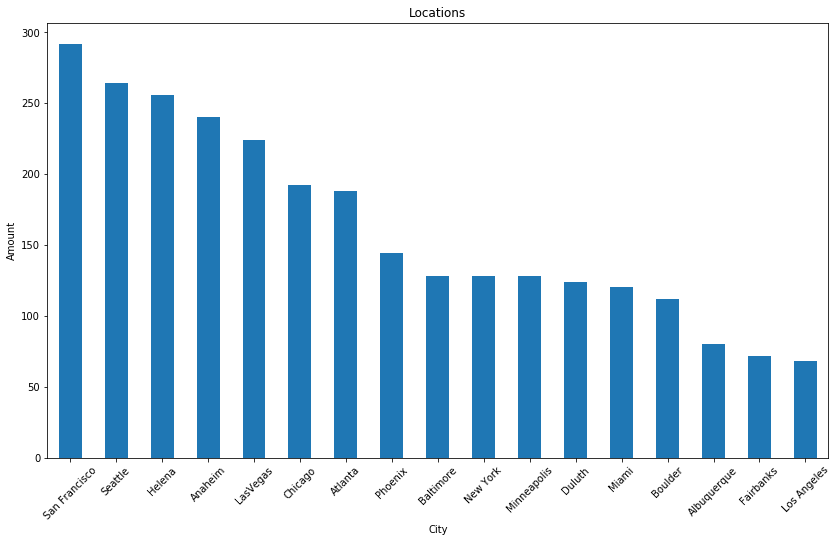

In [149]:
# Sites representative across all cost levels?

ax = all_df['City'].value_counts().plot(kind='bar',
                                  figsize=(14,8),
                                  title='Locations')

ax.set_xlabel('City')
ax.set_ylabel('Amount')
plt.xticks(rotation=45);

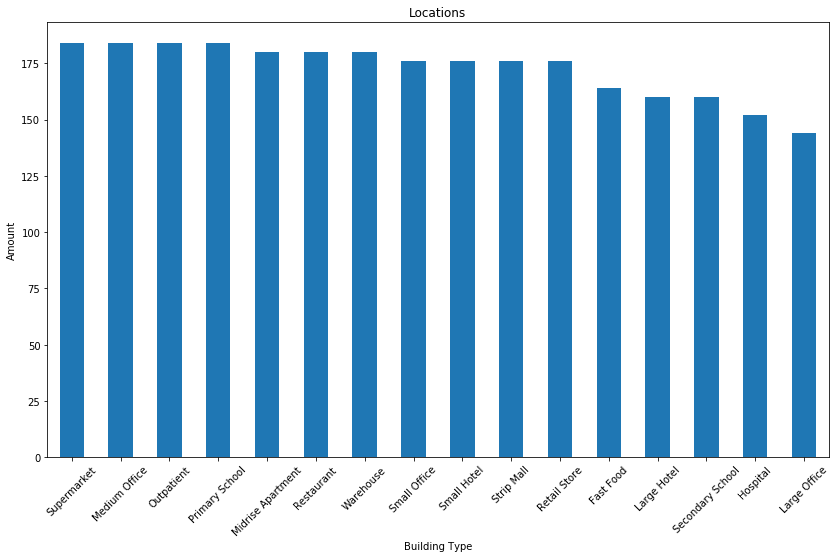

In [150]:
ax = all_df['Building Type'].value_counts().plot(kind='bar',
                                  figsize=(14,8),
                                  title='Locations')

ax.set_xlabel('Building Type')
ax.set_ylabel('Amount')
plt.xticks(rotation=45);

In [153]:
# Only 24 sites have an NPV - probably not useful

sum(i > 0 for i in mid['Npv ($)'])

24

In [154]:
all_df.corr()

,Cost Point Selector,Battery Capacity (kWh),Battery Power (kW),BAU Demand Cost,BAU Energy Cost,Capital Cost ($),Max Demand Rate ($/kW),Npv ($),PV Size (kW),Total Demand Savings ($),Total kWh Savings ($)
Cost Point Selector,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Battery Capacity (kWh),nan,1.00,0.97,0.52,0.43,0.77,0.26,0.75,0.70,0.75,0.71
Battery Power (kW),nan,0.97,1.00,0.61,0.48,0.84,0.32,0.76,0.76,0.78,0.76
BAU Demand Cost,nan,0.52,0.61,1.00,0.50,0.69,0.46,0.37,0.65,0.84,0.43
BAU Energy Cost,nan,0.43,0.48,0.50,1.00,0.78,-0.02,0.62,0.80,0.33,0.80
Capital Cost ($),nan,0.77,0.84,0.69,0.78,1.00,0.25,0.76,0.98,0.73,0.91
Max Demand Rate ($/kW),nan,0.26,0.32,0.46,-0.02,0.25,1.00,0.07,0.19,0.47,0.09
Npv ($),nan,0.75,0.76,0.37,0.62,0.76,0.07,1.00,0.69,0.46,0.87
PV Size (kW),nan,0.70,0.76,0.65,0.80,0.98,0.19,0.69,1.00,0.67,0.89
Total Demand Savings ($),nan,0.75,0.78,0.84,0.33,0.73,0.47,0.46,0.67,1.00,0.45


In [23]:
all_df.drop(columns=['Npv ($)'], axis=1, inplace=True)

In [19]:
battery = all_df[all_df['Battery Capacity (kWh)'] > 0]

print(battery.shape)
battery.head()

(942, 14)


,Rate,Building Type,City,Cost Point Selector,Battery Capacity (kWh),Battery Power (kW),BAU Demand Cost,BAU Energy Cost,Capital Cost ($),Max Demand Rate ($/kW),Npv ($),PV Size (kW),Total Demand Savings ($),Total kWh Savings ($)
0,E-19_Medium_General_Demand_TOU_(Secondary_Volu...,Fast Food,San Francisco,1,65,11,87751.00,164109.00,41000,34.70,0,56,32045.80,74991.00
4,A-10_Medium_General_Demand_Service_(Secondary_...,Supermarket,San Francisco,1,903,125,471299.00,2346650.00,551000,16.70,0,770,225257.00,1325750.00
13,SC-9_-_General_Large_Voluntary_TOD_Service_[NYC],Primary School,New York,1,873,126,942290.00,913007.00,461000,41.90,0,587,514560.00,534379.00
17,Time-Of-Use_-_General_Service_-_Large_TOU-8_Op...,Large Office,Anaheim,1,2401,442,2600780.00,6888430.00,2017000,15.50,2000000,3036,1049090.00,4642500.00
20,A-10_Medium_General_Demand_Service_TOU_(Second...,Outpatient,San Francisco,1,659,95,400082.00,1772560.00,423000,16.70,0,600,190241.00,1044990.00


In [22]:
battery.drop(columns=['Npv ($)'], axis=1, inplace=True)

print(battery.shape)
battery.head()

(942, 13)


/Users/mattmastin/.pyenv/versions/3.8.1/lib/python3.8/site-packages/pandas/core/frame.py:4110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Rate,Building Type,City,Cost Point Selector,Battery Capacity (kWh),Battery Power (kW),BAU Demand Cost,BAU Energy Cost,Capital Cost ($),Max Demand Rate ($/kW),PV Size (kW),Total Demand Savings ($),Total kWh Savings ($)
0,E-19_Medium_General_Demand_TOU_(Secondary_Volu...,Fast Food,San Francisco,1,65,11,87751.00,164109.00,41000,34.70,56,32045.80,74991.00
4,A-10_Medium_General_Demand_Service_(Secondary_...,Supermarket,San Francisco,1,903,125,471299.00,2346650.00,551000,16.70,770,225257.00,1325750.00
13,SC-9_-_General_Large_Voluntary_TOD_Service_[NYC],Primary School,New York,1,873,126,942290.00,913007.00,461000,41.90,587,514560.00,534379.00
17,Time-Of-Use_-_General_Service_-_Large_TOU-8_Op...,Large Office,Anaheim,1,2401,442,2600780.00,6888430.00,2017000,15.50,3036,1049090.00,4642500.00
20,A-10_Medium_General_Demand_Service_TOU_(Second...,Outpatient,San Francisco,1,659,95,400082.00,1772560.00,423000,16.70,600,190241.00,1044990.00


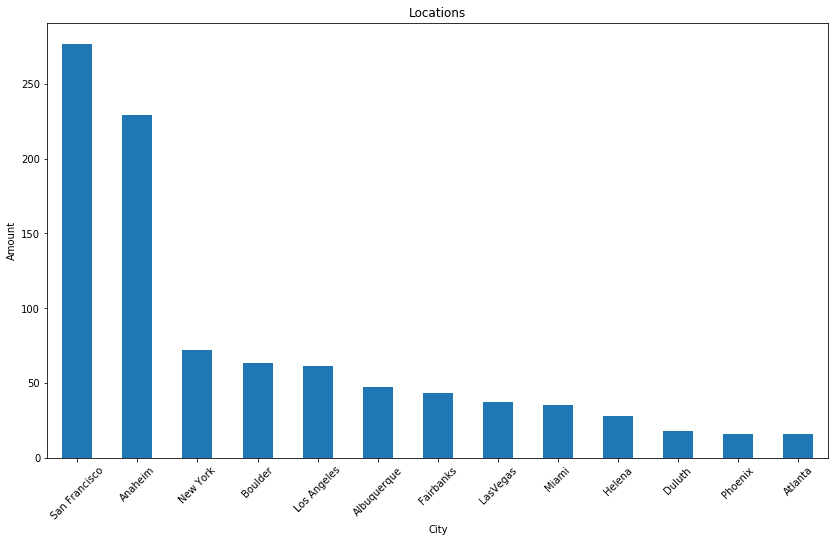

In [161]:
ax = battery['City'].value_counts().plot(kind='bar',
                                  figsize=(14,8),
                                  title='Locations')

ax.set_xlabel('City')
ax.set_ylabel('Amount')
plt.xticks(rotation=45);

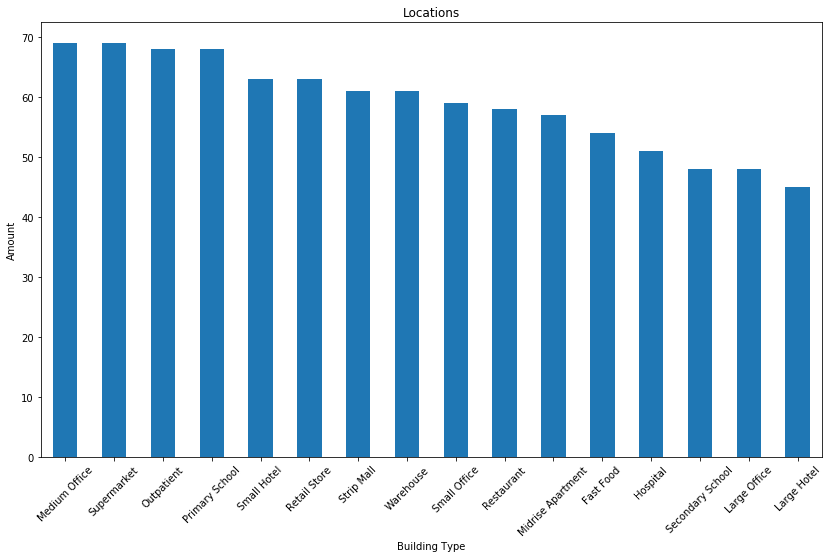

In [162]:
ax = battery['Building Type'].value_counts().plot(kind='bar',
                                  figsize=(14,8),
                                  title='Locations')

ax.set_xlabel('Building Type')
ax.set_ylabel('Amount')
plt.xticks(rotation=45);

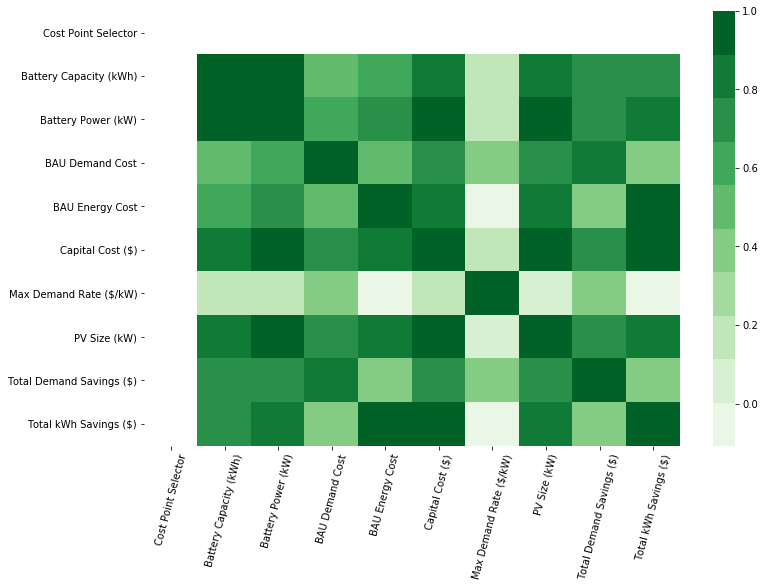

In [40]:
plt.figure(figsize=(12, 8))
plt.xticks(rotation=45)
cmap = sns.color_palette('Greens', 10)
heatmap = sns.heatmap(battery.corr(), cmap=cmap)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=75);

In [15]:
batter

,Rate,Building Type,City,Cost Point Selector,Battery Capacity (kWh),Battery Power (kW),BAU Demand Cost,BAU Energy Cost,Capital Cost ($),Max Demand Rate ($/kW),Npv ($),PV Size (kW),Total Demand Savings ($),Total kWh Savings ($)
0,E-19_Medium_General_Demand_TOU_(Secondary_Volu...,Fast Food,San Francisco,1,65,11,87751.00,164109.00,41000,34.70,0,56,32045.80,74991.00
4,A-10_Medium_General_Demand_Service_(Secondary_...,Supermarket,San Francisco,1,903,125,471299.00,2346650.00,551000,16.70,0,770,225257.00,1325750.00
13,SC-9_-_General_Large_Voluntary_TOD_Service_[NYC],Primary School,New York,1,873,126,942290.00,913007.00,461000,41.90,0,587,514560.00,534379.00
17,Time-Of-Use_-_General_Service_-_Large_TOU-8_Op...,Large Office,Anaheim,1,2401,442,2600780.00,6888430.00,2017000,15.50,2000000,3036,1049090.00,4642500.00
20,A-10_Medium_General_Demand_Service_TOU_(Second...,Outpatient,San Francisco,1,659,95,400082.00,1772560.00,423000,16.70,0,600,190241.00,1044990.00


In [1]:
# Better explore correlations
# capital cost vs kWh savings?